# N5 Набор данных

Автор: Шабанов Павел Александрович

Email: pa.shabanov@gmail.com

URL:
+ [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 15.02.2017


### План занятия

1. MOPEX project:
    + downloading данных с помощью FileZilla;
    + локальный репозитарий dataset.
2. Пример эффективной обработки данных с помощью модуля Pandas.

### Цель 

+ узнать новое о гидрологических данных (требуется англ. яз) из международных баз и банков данных;
+ повысить технологические навыки работы с научными хранилищами данных;
+ освоить Python через постепенную работу с актуальными научными данными.

### Ссылки 

+ [MOPEX project](http://www.nws.noaa.gov/ohd/mopex/mo_datasets.htm)

+ [FTP с данными](ftp://hydrology.nws.noaa.gov/pub/gcip/mopex/US_Data/)

+ [USGS Current Water Data for the Nation](https://waterdata.usgs.gov/nwis/rt)

+ [Шпаргалка по статистическому анализу](http://playittodeath.ru/shpargalka-po-statisticheskomy-analizu/)

## MOPEX project

В ходе этого курса мы будем работать с данными MOPEX - Model Parameter Estimation Experiment. Цель данного проекта - сбор и хранение исторических гидрометеорологических данных и характеристик для ~200 речных бассейнов промежуточного масштаба (500 - 10 000 км2), расположенных в различных климатических условиях по всему миру.

Для учебных целей мы будем использовать различные его части. 

### Downloading data

#### download with Windows OS
Необходимо скачать с ftp сервера данные. Это можно сделать вручную, окрывая файлы и сохраняя их на жёсткий диск ПК. Либо использовать спеиальное ПО, например, FileZilla. 

Как пользоваться FileZilla?

Скачав [актуальную версию FileZilla](http://filezilla.ru/) и установив её стандартным способом на ПК, открываем:

1. Файл -> Менеджер сайтов

2. Хост: **hydrology.nws.noaa.gov**

3. Тип входа: **Анонимный**

4. Нажимаем "Соединить"

5. В появившемся списке файлов проходим в **pub/gcip/mopex/US_Data/Us_438_Daily/**

6. Наведя курсор мыши на файл нажимаем правую кнопку и из выпадающего меню выбираем "Скачать".

7. Можно выделить множество файлов и при правом клике выбрать "Добавить файлы в задание". При этом выбранные файлы будут добавлены в список и отображаться внизу. После этого можно нажать правой кнопкой мыши на этом окне и выбрать "Выполнить задание". Все файлы из группы будут загружены.

**N.B.** КУДА СКАЧИВАЮТСЯ файлы? Они скачиваются в открытую в левой части окна FileZilla (локальный сайт) папку. 

По умолчанию это: C:/Users/username

### Локальный репозитарий dataset

Создадим папку под названием "dataset" и скопируем туда данные 10 пунктов, а таже файл **readme.txt**

Используя Python, узнаем, что написано в файле **readme.txt**

In [10]:
# Пример 5.1 Чтение и вывод на экран содержимого файла

# Небольшая программа для вывода на экран содержимого файла

f = open('./dataset/readme.txt', 'r')
s = f.read()   # чтение содержимого файла в строку s
print s   # вывод на экран

This sub-directory contains daily time series of hydrologic data. 
The precipitation is processed in NWS Hydrology Laboratory. 
The Potential Evaporation is based on NOAA Evaporation Atlas 
(Farnsworth, et al., 1982). The streamflow is obtained from 
USGS National Water Information System (NWIS) (available at
http://water.usgs.gov/nwis):

Col. 1: date (yyyymmdd)
     2: mean areal precipitation (mm)
     3: climatic potential evaporation (mm)
       (based NOAA Freewater Evaporation Atlas)
     4: daily streamflow discharge (mm)
     5: daily maximum air temperature (Celsius)
     6: daily minimum air temperature (Celsius)
     
The ZIPS directory contains zipped time series data.  
These are orgainized by USGS gage numbers.  
Data for basins with gage numbers beginning with 09 and higher
are in dly09.zip.  
Data for basins with gage numbers beginning with 0x are in dly0x.zip.



С помощью команды print 

In [11]:
# Пример 5.1 Тип объекта

# ЧТо такое объекта s?

print type(s)   # вывести на экран тип объекта

# вывести на экран длину объекта ЕСЛИ тип объекта - строка!
if type(s) is str:
    print 'String contains ', len(s), 'symbols'

<type 'str'>
String contains  890 symbols


In [12]:
# Пример 5.2

# fileName = '14113000.dly'

f = open('./dataset/14113000.dly', 'r')
s = f.read()   # чтение содержимого файла в строку s

print s[:1000]   # вывод на экран части строки

1948 1 1   11.0000    0.0000    0.8830    5.4056   -1.2278
1948 1 2   10.1100    0.0000    1.5198    5.3667   -0.1278
1948 1 3    6.5200    0.0000    1.3823    4.3222   -1.8778
1948 1 4    3.2700    0.0000    1.3389    3.8667   -1.1889
1948 1 5   37.1700    0.0000    1.2086    2.0000   -3.8611
1948 1 6   51.1800    0.0000    3.0759    2.5722   -1.3278
1948 1 7   13.1300    0.0000    7.6716    5.9389    0.4944
1948 1 8    2.5600    0.0000    3.9661    4.9833   -1.0056
1948 1 9    4.9500    0.0000    2.7936    2.5667   -6.1444
1948 110   13.0700    0.0000    2.4173    2.1889   -5.1500
1948 111    3.6700    0.0000    2.2436    3.6889   -2.1778
1948 112    0.0000    0.0000    1.9686    2.5167   -6.1556
1948 113    0.0000    0.0000    1.7080    1.5944   -7.5222
1948 114    0.0000    0.0000    1.5633    0.8333   -8.5389
1948 115    0.0000    0.0000    1.4764   -0.1944   -6.5167
1948 116    0.0000    0.0000    1.3823   -0.8389   -8.3000
1948 117    0.0000    0.0000    1.2955   -1.8444   -7.25

### Наша цель - делать примерно вот так!

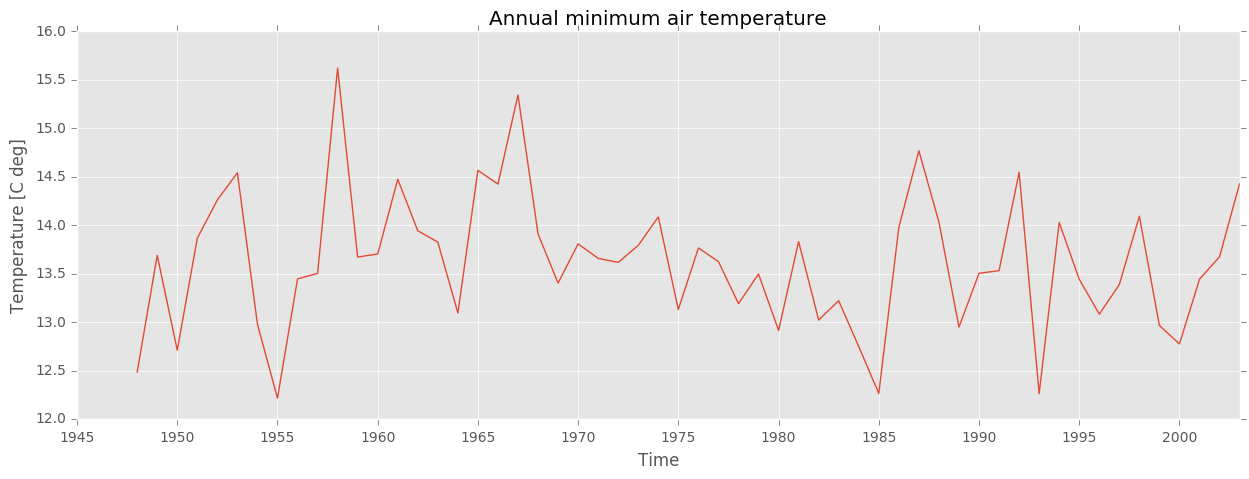

               0   1   2      3    4     5       6
20434 2003-01-01  12  12  10.47  0.0 -99.0  2.1778
20435 2003-01-01  12  13  39.45  0.0 -99.0  2.2333
20436 2003-01-01  12  14   3.98  0.0 -99.0  1.7556
20437 2003-01-01  12  15   0.87  0.0 -99.0  2.3389
20438 2003-01-01  12  16   1.65  0.0 -99.0  2.3889
20439 2003-01-01  12  17   0.19  0.0 -99.0  2.6222
20440 2003-01-01  12  18   0.06  0.0 -99.0  2.1056
20441 2003-01-01  12  19   0.00  0.0 -99.0  1.1333
20442 2003-01-01  12  20   4.98  0.0 -99.0  2.9556
20443 2003-01-01  12  21   1.46  0.0 -99.0  3.0333
20444 2003-01-01  12  22   0.03  0.0 -99.0  1.5556
20445 2003-01-01  12  23   2.22  0.0 -99.0  1.5167
20446 2003-01-01  12  24   9.47  0.0 -99.0  2.6722
20447 2003-01-01  12  25   1.65  0.0 -99.0  2.5056
20448 2003-01-01  12  26   0.61  0.0 -99.0  1.2500
20449 2003-01-01  12  27  10.10  0.0 -99.0  0.0222
20450 2003-01-01  12  28  10.63  0.0 -99.0 -0.8056
20451 2003-01-01  12  29  10.31  0.0 -99.0 -1.7944
20452 2003-01-01  12  30   0.12

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

fwidths = [4,2,2,10,10,10,10]
df = pd.read_fwf('./dataset/14113000.dly', widths=fwidths,
                 parse_dates=[0, 1, 2],
                 header=None, index_col=False)
z = df.ix[:, 6]
z.index = df.ix[:, 0]
za = z.resample('A').mean()


plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок
plt.plot(za)
plt.grid(color='w')
plt.xticks(pd.date_range('1945', '2005', freq='5A'))

plt.savefig('./imgs/N5/day_min_temp_annual.png', 
            format='png', dpi=200, bbox_inches='tight')
plt.title('Annual MIN temperaturen ')
plt.ylabel('Temperature [C deg]')
plt.xlabel('Time')
plt.title('Annual minimum air temperature')

plt.show()

print df.tail(20)

In [20]:
"Тип данных - строка"
# Пример 5.3

f = open('./dataset/14113000.dly', 'r')
s = f.readline()   # чтение ОДНОЙ строки файла в строку s

print type(s), len(s), '\n', s

<type 'str'> 59 
1948 1 1   11.0000    0.0000    0.8830    5.4056   -1.2278



### Чтение данных

[Чтение данных на Python 7 способами + сравнение скорости чтения данных](https://www.easycoding.org/2017/01/23/schityvaem-chislovye-dannye-iz-fajla-na-python.html)